# Figures for Two Sensors (Double)
In this notebook we generate the figures from the data registered during the training of Two Sensors (Double) experiment.

In [3]:
import random
import numpy as np
import matplotlib.pyplot as plt
import time
import pandas as pd
from IPython.display import clear_output
import seaborn as sns
sns.set()

In [5]:
df = pd.read_csv('data-TSD.csv')
N_Episodes = len(df)
def plot_pred_vs_test(sample,zone):
    df_aux = sample[sample['Zone']==zone]
    plt.plot(df_aux['d_test'], df_aux['d_predicted'],'.',label="Predictions")
    aux = range(0, int(np.ceil(max(df_aux['d_test']))))
    plt.plot(aux, aux,'--',label = 'Perfect predictions')
    plt.xlabel('d test')
    plt.ylabel('d predicted')
    plt.legend()
    plt.grid(False)

## Distribution of landings per zone
In the following figure we can observe the histogram of the landings corresponding to each zone. Since we sample unifromly at random  𝑀  and  𝑑∝1/𝑀2  the zones closer to the cannon have quadratically more instances than those further away.

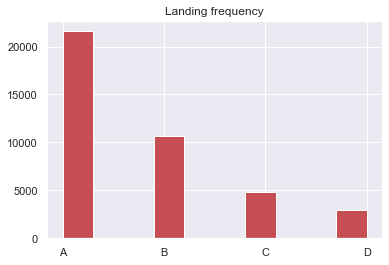

In [7]:
zones = ['A', 'B', 'C', 'D']
sample_size = 0.2
sample=df.loc[np.r_[N_Episodes-N_Episodes*sample_size:N_Episodes], :]
# We plot an histogram of the zone distribution to observe the expected
# unbalanced distribution of landing zones
for zone in zones:
    sample['Zone'].hist()
plt.title('Landing frequency')
plt.savefig('plots/frequency_zones-TSD.pdf')

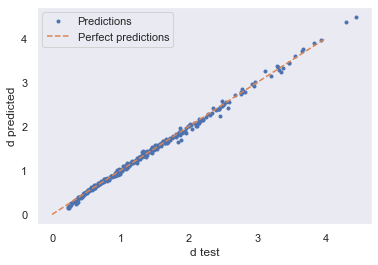

In [8]:
zones = ['A', 'B', 'C', 'D']
sample_size = 0.003
sample=df.loc[np.r_[N_Episodes-N_Episodes*sample_size:N_Episodes], :]
plot_pred_vs_test(sample,'A')
plt.savefig('plots/zoneA-TSD.pdf')


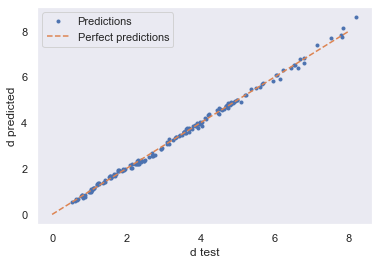

In [9]:
plot_pred_vs_test(sample,'B')
plt.savefig('plots/zoneB-TSD.pdf')


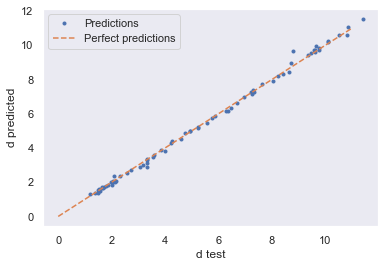

In [10]:
plot_pred_vs_test(sample,'C')
plt.savefig('plots/zoneC-TSD.pdf')

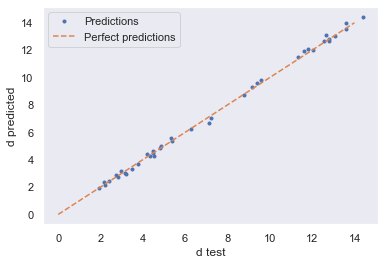

In [11]:
plot_pred_vs_test(sample,'D')
plt.savefig('plots/zoneD-TSD.pdf')

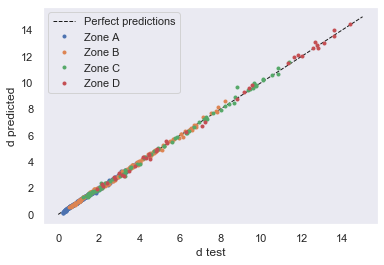

In [12]:
def plot_pred_vs_test(sample,zone):
    df_aux = sample[sample['Zone']==zone]
    plt.plot(df_aux['d_test'], df_aux['d_predicted'],'.',label="Zone " + zone)
    aux = range(0, int(np.ceil(max(df_aux['d_test']))))
    plt.xlabel('d test')
    plt.ylabel('d predicted')
    plt.grid(False)
plt.plot(range(16),range(16)  ,'k--',linewidth=1, label = 'Perfect predictions')
plot_pred_vs_test(sample,'A')
plot_pred_vs_test(sample,'B')
plot_pred_vs_test(sample,'C')
plot_pred_vs_test(sample,'D')
plt.legend()
plt.savefig('plots/zoneAll-TSD.pdf')

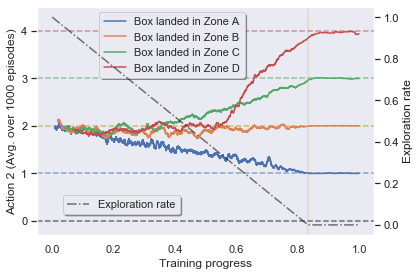

In [13]:
fig, ax1 = plt.subplots()
color = 'k'
window = int(N_Episodes/200)
marker=0
eps=1
while eps>0.0001:
    eps=df['Exploration rate'][marker]
    marker=marker+1

ax1.axhline(y=0,color='k',linestyle='--',alpha=0.6)
ax1.axhline(y=1,color='b',linestyle='--',alpha=0.6)
ax1.axhline(y=3,color='g',linestyle='--',alpha=0.6)
ax1.axhline(y=2,color='y',linestyle='--',alpha=1)
ax1.axhline(y=4,color='r',linestyle='--',alpha=0.6)
for zone in zones:
    df_aux=df[df['Zone'] == zone]
    average_action = df_aux['Action 2'].rolling(window=window).mean()
    ax1.plot(np.array(range(len(average_action)))/len(average_action), 
              average_action, label = 'Box landed in Zone ' + zone)
    
plt.ylim([-0.3,4.5])
plt.xlabel('Training progress')
plt.ylabel('Action 2 (Avg. over ' + str(window) + ' episodes)')
ax1.legend(loc='upper center', bbox_to_anchor=(0.4, 1), shadow=True, ncol=1)
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(False)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Exploration rate', color=color)  # we already handled the x-label with ax1
ax2.plot(np.array(range(len(df)))/len(df),df['Exploration rate'],'k-.', label = 'Exploration rate', alpha=0.6)
ax2.tick_params(axis='y', labelcolor=color)
ax2.axvline(x=marker/len(df),color='y',linestyle='-',alpha=0.3)
ax2.grid(False)
ax2.legend(loc='upper center', bbox_to_anchor=(0.25, 0.2), shadow=True, ncol=1)
fig.tight_layout()
plt.savefig('plots/Actions2-TSD.pdf')

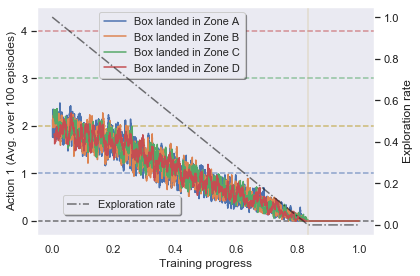

In [14]:
fig, ax1 = plt.subplots()
color = 'k'
window = int(N_Episodes/2000)
marker=0
eps=1
while eps>0.0001:
    eps=df['Exploration rate'][marker]
    marker=marker+1

ax1.axhline(y=0,color='k',linestyle='--',alpha=0.6)
ax1.axhline(y=1,color='b',linestyle='--',alpha=0.6)
ax1.axhline(y=3,color='g',linestyle='--',alpha=0.6)
ax1.axhline(y=2,color='y',linestyle='--',alpha=1)
ax1.axhline(y=4,color='r',linestyle='--',alpha=0.6)
for zone in zones:
    df_aux=df[df['Zone'] == zone]
    average_action = df_aux['Action 1'].rolling(window=window).mean()
    ax1.plot(np.array(range(len(average_action)))/len(average_action), 
              average_action, label = 'Box landed in Zone ' + zone)
    
plt.ylim([-0.3,4.5])
plt.xlabel('Training progress')
plt.ylabel('Action 1 (Avg. over ' + str(window) + ' episodes)')
ax1.legend(loc='upper center', bbox_to_anchor=(0.4, 1), shadow=True, ncol=1)
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(False)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Exploration rate', color=color)  # we already handled the x-label with ax1
ax2.plot(np.array(range(len(df)))/len(df),df['Exploration rate'],'k-.', label = 'Exploration rate', alpha=0.6)
ax2.tick_params(axis='y', labelcolor=color)
ax2.axvline(x=marker/len(df),color='y',linestyle='-',alpha=0.3)
ax2.grid(False)
ax2.legend(loc='upper center', bbox_to_anchor=(0.25, 0.2), shadow=True, ncol=1)
fig.tight_layout()
plt.savefig('plots/Actions1-TSD.pdf')

C:\Users\eduar\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:16: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  app.launch_new_instance()
C:\Users\eduar\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:16: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  app.launch_new_instance()
C:\Users\eduar\AppData\Roaming\Python\Python37\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


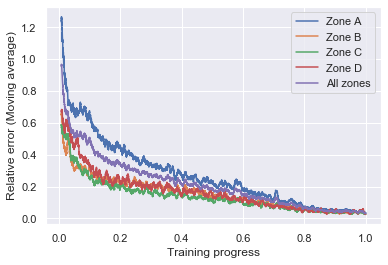

In [15]:
window=0.008
for zone in zones:
    df_aux=df[df['Zone'] == zone]
    rel_error = abs((df_aux['d_test']-df_aux['d_predicted'])/df_aux['d_test'])
    avg_rel_error = rel_error.rolling(int(window*len(rel_error))).mean()
    plt.plot(np.array(range(len(avg_rel_error)))/len(avg_rel_error),
             avg_rel_error, label ='Zone '+ zone)
rel_error = abs((df['d_test']-df['d_predicted'])/df['d_test'])
avg_rel_error = rel_error.rolling(int(window*len(df))).mean()
plt.plot(np.array(range(len(avg_rel_error)))/len(avg_rel_error), 
         avg_rel_error,  label = 'All zones')
plt.xlabel('Training progress')
plt.ylabel('Relative error (Moving average)')
ax2.axvline(x=marker/len(df),color='y',linestyle='-',alpha=0.3)
plt.legend()
plt.savefig('plots/Relative-Error-TSD.pdf')

C:\Users\eduar\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:16: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  app.launch_new_instance()
C:\Users\eduar\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:16: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  app.launch_new_instance()
C:\Users\eduar\AppData\Roaming\Python\Python37\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


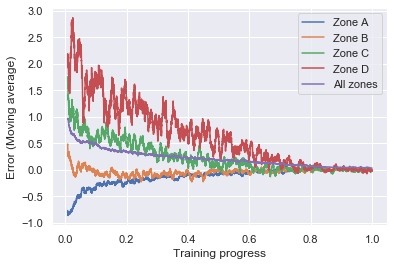

In [16]:
window=0.008
for zone in zones:
    df_aux=df[df['Zone'] == zone]
    error = df_aux['d_test']-df_aux['d_predicted']
    avg_error = error.rolling(int(window*len(error))).mean()
    plt.plot(np.array(range(len(avg_error)))/len(avg_error),
             avg_error, label ='Zone '+ zone)
error = abs((df['d_test']-df['d_predicted'])/df['d_test'])
rel_error = rel_error.rolling(int(window*len(df))).mean()
plt.plot(np.array(range(len(rel_error)))/len(rel_error), 
         rel_error,  label = 'All zones')
plt.xlabel('Training progress')
plt.ylabel('Error (Moving average)')
ax2.axvline(x=marker/len(df),color='y',linestyle='-',alpha=0.3)
plt.legend()
plt.savefig('plots/Error-TSD.pdf')

C:\Users\eduar\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:16: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  app.launch_new_instance()
C:\Users\eduar\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:16: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  app.launch_new_instance()
C:\Users\eduar\AppData\Roaming\Python\Python37\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


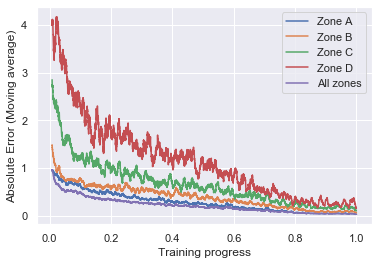

In [17]:
window=0.008
for zone in zones:
    df_aux=df[df['Zone'] == zone]
    abs_error = abs(df_aux['d_test']-df_aux['d_predicted'])
    avg_abs_error = abs_error.rolling(int(window*len(abs_error))).mean()
    plt.plot(np.array(range(len(avg_abs_error)))/len(avg_abs_error),
             avg_abs_error, label ='Zone '+ zone)
abs_error = abs((df['d_test']-df['d_predicted'])/df['d_test'])
avg_abs_error = abs_error.rolling(int(window*len(df))).mean()
plt.plot(np.array(range(len(avg_abs_error)))/len(avg_abs_error), 
         avg_abs_error,  label = 'All zones')
plt.xlabel('Training progress')
plt.ylabel('Absolute Error (Moving average)')
ax2.axvline(x=marker/len(df),color='y',linestyle='-',alpha=0.3)
plt.legend()
plt.savefig('plots/Absolute-Error-TSD.pdf')

C:\Users\eduar\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:13: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  del sys.path[0]
C:\Users\eduar\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:13: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  del sys.path[0]
C:\Users\eduar\AppData\Roaming\Python\Python37\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


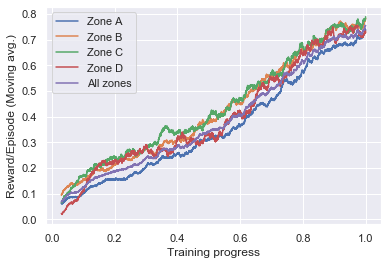

In [18]:
window=0.03
for zone in zones:
    dfa=df[df['Zone'] == zone ]
    reward = dfa['Reward']
    avg_reward = reward.rolling(int(window*len(reward))).mean()
    plt.plot(np.array(range(len(avg_reward)))/len(avg_reward), avg_reward, label ='Zone '+ zone)
reward = df['Reward']
avg_reward = reward.rolling(int(window*len(reward))).mean()
plt.plot(np.array(range(len(avg_reward)))/len(avg_reward), avg_reward, label = 'All zones')
plt.xlabel('Training progress')
plt.ylabel('Reward/Episode (Moving avg.)')
plt.legend()
plt.savefig('plots/Rewards-TSD.pdf')